[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1LW0GI832qnoir1z34Qarkswt0ILyEE4g)

# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [16]:
def read_data(filename):
    """
    Reads data from the passed-in file, returning a pair of matrices (x, y)
    where each row x[i] is a d-dimensional training point with corresponding 
    label y[i].
    """
    data = np.loadtxt(filename, comments='#', delimiter=',')
    # The first column of each row is the label y
    y = data[:,0]
    x = data[:,1:]
    # Add bias column
    #x = np.append(x, np.ones((x.shape[0], 1)), axis=1)
    return (x, y)

In [17]:
import requests

url_dict = {
    'wine_training1.txt': 'https://drive.google.com/uc?export=download&id=178ewdrScC06GzCV5QzwLNLI6SYjdrGHP',
    'wine_training2.txt': 'https://drive.google.com/uc?export=download&id=16va8tYrEim6ODQo7HJq-oJ2Cd-eOITw2',
    'wine_validation.txt': 'https://drive.google.com/uc?export=download&id=1ml7m8HEeZABtNhgec6nJfb4kVLsFyxlx',
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [18]:
# Download files
download_file('wine_training1.txt')
download_file('wine_training2.txt')
download_file('wine_validation.txt')

# Read in training data
x1, y1 = read_data('wine_training1.txt')
x2, y2 = read_data('wine_training2.txt')

# Read in validation data
xvalid, yvalid = read_data('wine_validation.txt')

Start downloading...
Complete
Start downloading...
Complete
Start downloading...
Complete


In [19]:
def loss(X, Y, w):
    """
    Computes the squared loss for linear regression.
    """
    return np.mean(np.log(1 + np.exp(-Y * np.dot(X,w))))

def gradient(X, Y, w, N, lambda_val):
    """
    Computes the gradient of the squared loss for linear regression.
    """
    return (-Y*X)/(1 + np.exp(Y * np.dot(w, X))) + 2 * w * (lambda_val/N)


def sgd (X, Y, w, lr, num_iters, lambda_val):
    """
    Runs stochastic gradient descent on the given data X and Y, using a learning rate of lr
    and running for num_iters iterations. Returns the final weight vector.
    """
    N = len(X)
    for i in range(num_iters):
        idx = np.random.permutation(N)
        X = X[idx]
        Y = Y[idx]
        for j in range(N):
            grad = gradient(X[j], Y[j], w, N, lambda_val)
            w = w - lr * grad
    return w

N_epochs = 20000
lr = 0.0005
lambda_vals = [(0.00001)*(5**i) for i in range(15)]
num = 14

training_errors1 = []
training_errors2 = []
test_errors1 = []
test_errors2 = []
l2_norms1 = []
l2_norms2 = []

ZS1 = (x1 - np.mean(x1, axis=0)) / np.std(x1, axis=0)
ZS2 = (x2 - np.mean(x2, axis=0)) / np.std(x2, axis=0)
ZV1 = (xvalid - np.mean(x1, axis=0)) / np.std(x1, axis=0)
ZV2 = (xvalid - np.mean(x2, axis=0)) / np.std(x2, axis=0)

ZS1 = np.append(ZS1, np.ones((ZS1.shape[0], 1)), axis=1)
ZS2 = np.append(ZS2, np.ones((ZS2.shape[0], 1)), axis=1)
ZV1 = np.append(ZV1, np.ones((ZV1.shape[0], 1)), axis=1)
ZV2 = np.append(ZV2, np.ones((ZV2.shape[0], 1)), axis=1)

for lambda_val in lambda_vals:
    WZ1 = np.random.randn(num)*0.01
    WZ2 = np.random.randn(num)*0.01
    WFZ1 = sgd(ZS1, y1, WZ1, lr, N_epochs, lambda_val)
    WFZ2 = sgd(ZS2, y2, WZ2, lr, N_epochs, lambda_val)
    training_errors1.append(loss(ZS1, y1, WFZ1))
    training_errors2.append(loss(ZS2, y2, WFZ2))
    test_errors1.append(loss(ZV1, yvalid, WFZ1))
    test_errors2.append(loss(ZV2, yvalid, WFZ2))
    l2_norms1.append(np.linalg.norm(WFZ1, ord=2))
    l2_norms2.append(np.linalg.norm(WFZ2, ord=2))


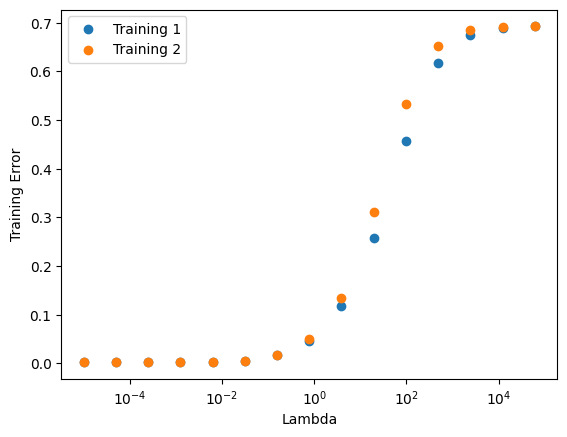

In [21]:
plt.figure()
plt.scatter(lambda_vals, training_errors1)
plt.scatter(lambda_vals, training_errors2)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Training Error')
plt.legend(['Training 1', 'Training 2'])
plt.show()

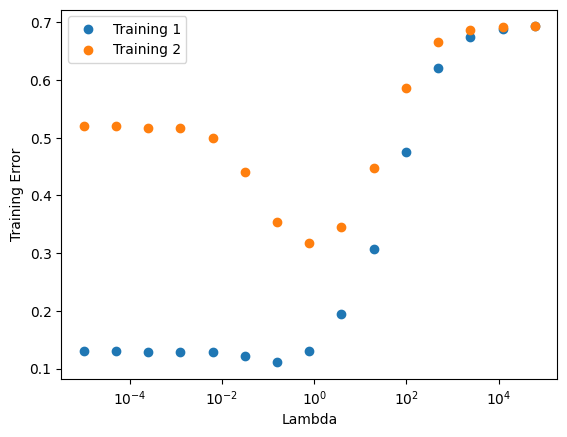

In [ ]:
plt.figure()
plt.scatter(lambda_vals, test_errors1)
plt.scatter(lambda_vals, test_errors2)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Test Error')
plt.legend(['Training 1', 'Training 2'])
plt.show()

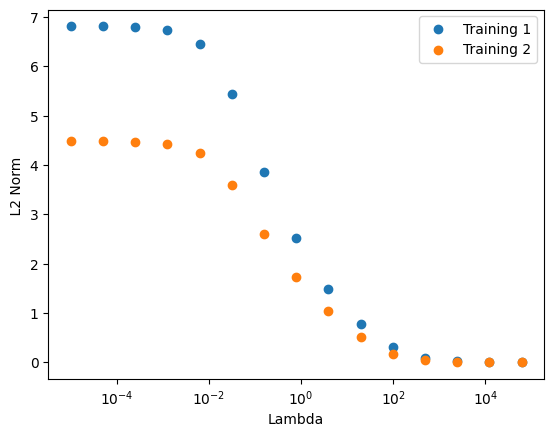

In [23]:
plt.figure()
plt.scatter(lambda_vals, l2_norms1)
plt.scatter(lambda_vals, l2_norms2)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('    L2 Norm')
plt.legend(['Training 1', 'Training 2'])
plt.show()